<font size="+5">#06. Decision Tree. A Supervised Classification Model</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Discipline to Search Solutions in Google

> Apply the following steps when **looking for solutions in Google**:
>
> 1. **Necesity**: How to load an Excel in Python?
> 2. **Search in Google**: by keywords
>   - `load excel python`
>   - ~~how to load excel in python~~
> 3. **Solution**: What's the `function()` that loads an Excel in Python?
>   - A Function to Programming is what the Atom to Phisics.
>   - Every time you want to do something in programming
>   - **You will need a `function()`** to make it
>   - Theferore, you must **detect parenthesis `()`**
>   - Out of all the words that you see in a website
>   - Because they indicate the presence of a `function()`.

# Load the Data

Load the dataset from [CIS](https://www.cis.es/cis/opencms/ES/index.html) executing the lines of code below:
> - The goal of this dataset is
> - To predict `internet_usage` of **people** (rows)
> - Based on their **socio-demographical characteristics** (columns)

In [50]:
import pandas as pd

url = 'https://raw.githubusercontent.com/py-thocrates/data/main/internet_usage_spain.csv'

df = pd.read_csv(url)
df.head()

,internet_usage,sex,age,education
0,0,Female,66,Elementary
1,1,Male,72,Elementary
2,1,Male,48,University
3,0,Male,59,PhD
4,1,Female,44,PhD


# Data Preprocessing

> - Categorical variables contains `text`
> - If you pass the data to the model
> - It won't know how to interpret the text
> - Therefore, you need a way to convert text values
> - To numbers such as `0` or `1` **Dummy Variables**
> - Which `function()` do you use to achieve this?

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model = DecisionTreeClassifier() 

In [53]:
y = df.internet_usage # variable target
X = df.drop(labels='internet_usage', axis=1) # variables explicativas

In [54]:
model.fit(X, y) # fallamos porque se ve que el modelo trabaja con números (float) pero "Female" es un string (variable categórica). Vamos a corregirlo con la función get_dummies de pandas.

ValueError: could not convert string to float: 'Female'

In [55]:
import pandas as pd

In [56]:
# df = pd.get_dummies(data = df)
# df # ahora sex_Female y sex_Male son numéricos, pero no tiene sentido tener ambos ya que un sujeto, si es Male, nunca será Female, por lo que dropeamos la columna de Female para sanear la DF
# con drop_first = True

In [57]:
df = pd.get_dummies(data = df, drop_first=True)
df 

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0
1,1,72,1,0,0,0,0,0
2,1,48,1,0,0,0,0,1
3,0,59,1,0,0,0,1,0
4,1,44,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2450,1,43,1,0,0,0,0,0
2451,1,18,0,1,0,0,0,0
2452,0,54,0,0,0,0,0,0
2453,1,31,1,1,0,0,0,0


In [58]:
# modificamos ahora X e y

y = df.internet_usage # variable target
X = df.drop(labels='internet_usage', axis=1) # variables explicativas

In [59]:
model.fit(X, y)

DecisionTreeClassifier()

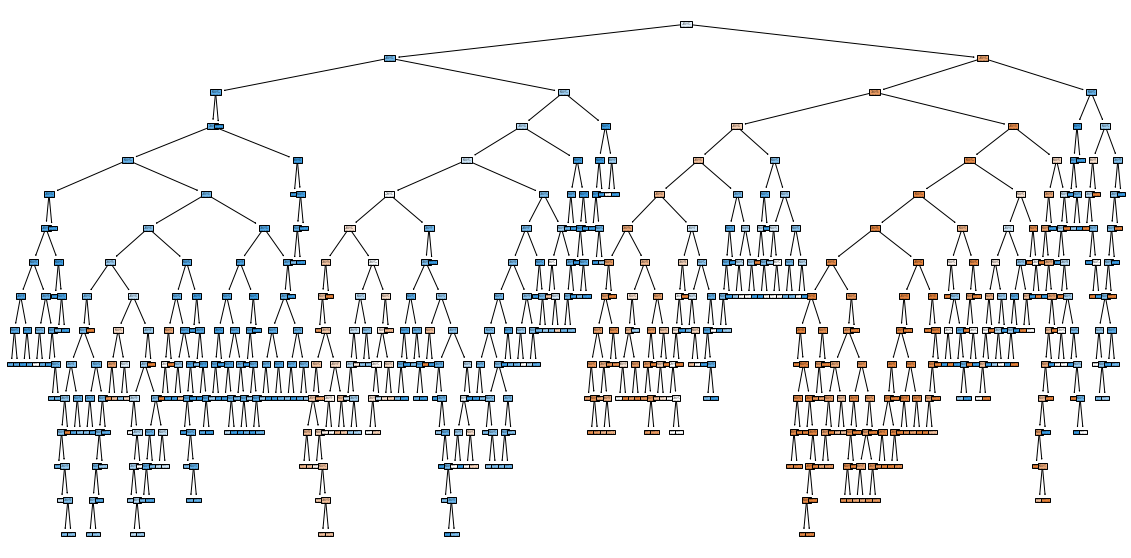

In [60]:
# Ahora vamos a plotearlo

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree=model, filled=True);

Vale, tenemos un problema, el árbol es jodidamente enorme, hay que recortarlo. Para ello, tendremos que aplicar el max_depth = 3, que te saldrán los 3 primeros niveles solamente. 

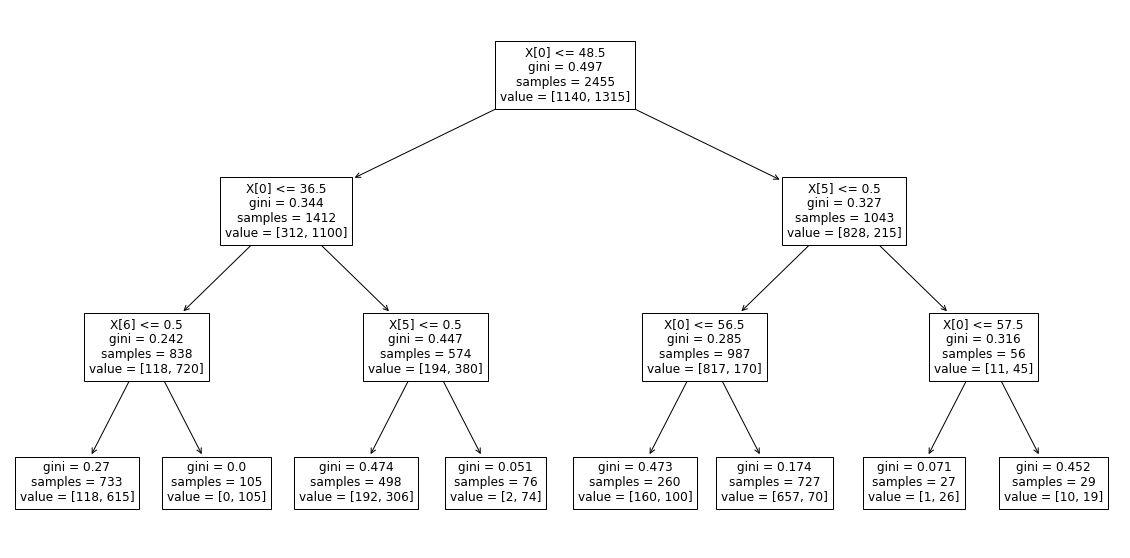

In [61]:
# definir modelo
model = DecisionTreeClassifier(max_depth = 3) # aquí hacemos la modificación

# nombrar X e y 
y = df.internet_usage 
X = df.drop(labels='internet_usage', axis=1) 

#ajuste de modelo
model.fit(X, y)

# plot
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree=model);

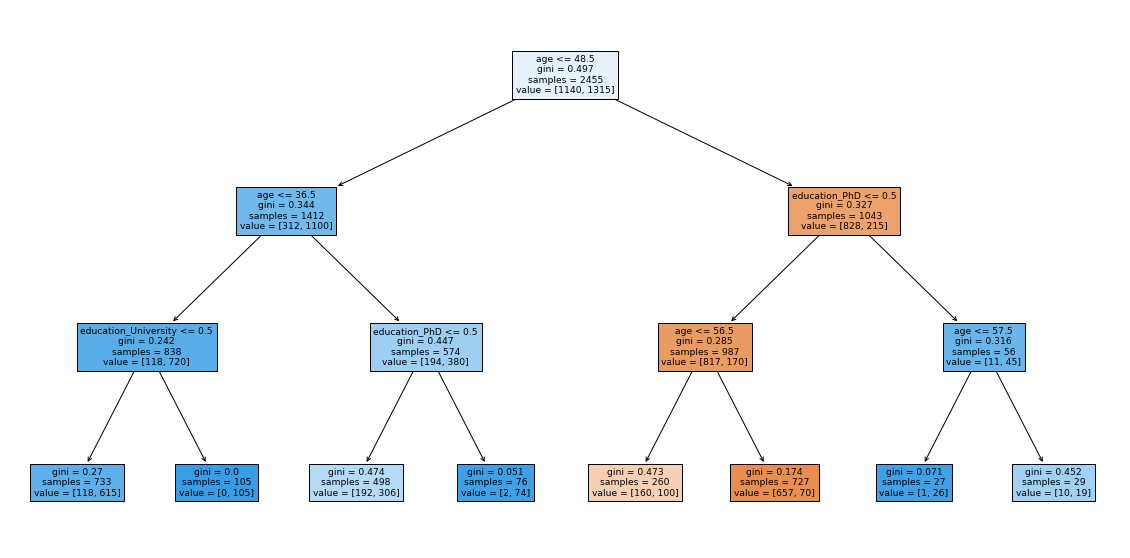

In [62]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

# `DecisionTreeClassifier()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> - By the time you get to the actual `function()` to compute the model
> - You'll notice they're asking you for two parameters:
> 1. `X`: **explanatory variables**
> 2. `y`: **target varaible**

In [63]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

model = DecisionTreeClassifier(max_depth=3) 

df = pd.get_dummies(data = df, drop_first=True)

y = df.internet_usage
X = df.drop(labels='internet_usage', axis=1)

### Finally `fit()` the Model

> - Pass the `objects` that **contains the sequence of numbers** of the two variables
> - To the `parameters` of the function that computes the Linear Regression Model

In [64]:
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

## Make a Prediction

> You should already know that ML models are
> mathematical equations that you optimize to
> calculate predictions
>
> As you `fit()` the model, the mathematical function
> is built. Therefore, could you make a prediction?
>
> - Select a random person:

In [65]:
person = df.sample()

In [66]:
person

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
900,1,31,0,1,0,0,0,0


In [67]:
explanatory_person = person.drop(columns='internet_usage')
explanatory_person

,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
900,31,0,1,0,0,0,0


> - Compute the probability of this person for `internet_usage`:

In [68]:
model.predict_proba(X=explanatory_person)

array([[0.16098226, 0.83901774]])

## Visualize the Model

> 1. Use `plot_tree()`, contained in `tree` module from `sklearn` library
> 2. Then, you may use `[shift] + [tab]` to see what **parameters** the function is asking for

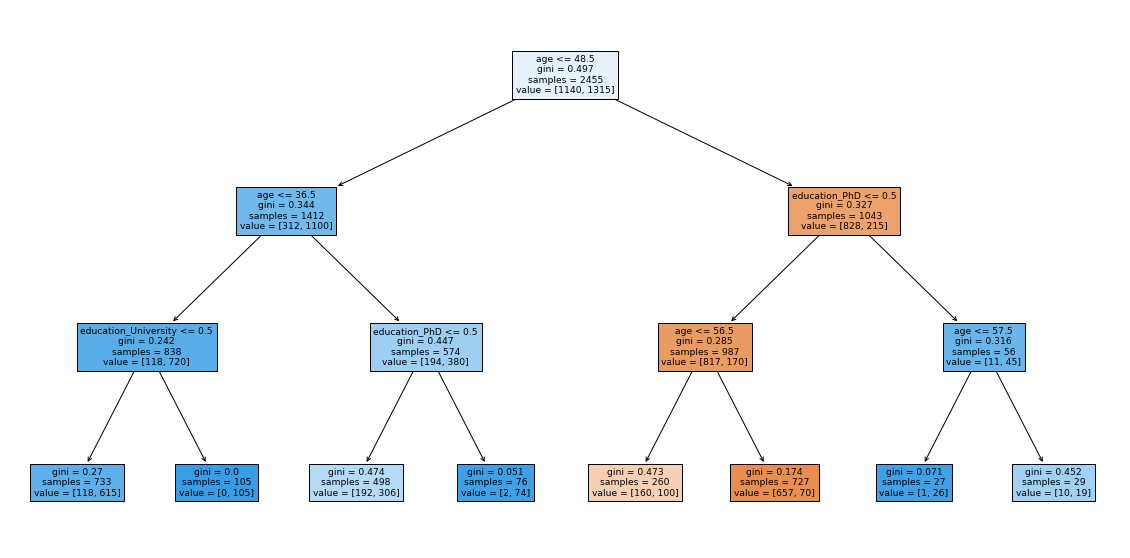

In [69]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

> - Could you justify how we got to the prediction in previous exercise?

In [70]:
70/727

0.09628610729023383

# Decision Tree Algorithm Explanation

> _You may watch the following video to understand how the Decision Tree works:_

In [71]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/7VeUPuFGJHk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Model Interpretation

> - Which is the variable in the **root node**?
> - Is it the most **important feature**? Why?

# Real vs. Predicted Data

> - Compute all predictions:
>
> - `model.predict()`

In [72]:
predict = model.predict(X)
predict

array([0, 0, 1, ..., 0, 1, 0])

> How good is our model?
>
> 1. Create a new `DataFrame` column to assign the predictions.
>
> - `df['pred'] = predictions`

In [74]:
dfsel = df[['internet_usage']].copy()
dfsel['pred'] = predict
dfsel

,internet_usage,pred
0,0,0
1,1,0
2,1,1
3,0,1
4,1,1
...,...,...
2450,1,1
2451,1,1
2452,0,0
2453,1,1


> - `df.sample(10)` to check if predictions are equal to reality:

In [75]:
dfsel.sample(10)

,internet_usage,pred
1604,0,0
1885,1,1
681,0,0
523,1,1
895,0,0
2090,0,0
1409,1,1
2317,0,1
1038,1,1
151,0,1


> 2. How to measure the **model's error**?
> - How good is our model to predict reality?
> - `model.score()`

In [76]:
model.score(X, y)

0.7991853360488799

In [77]:
(df.internet_usage == df.pred).sum()

1962

In [79]:
(df.internet_usage == df.pred).sum()/2455

0.7991853360488799

In [80]:
(df.internet_usage == df.pred).mean()

0.7991853360488799

In [78]:
2111/2455 # VAMOOOOOOO

0.859877800407332

# Confusion Matrix

> 1. Use function `confusion_matrix()`, or `plot_confusion_matrix()`
> 2. What represents the first number in the matrix?

In [81]:
from sklearn.metrics import plot_confusion_matrix

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


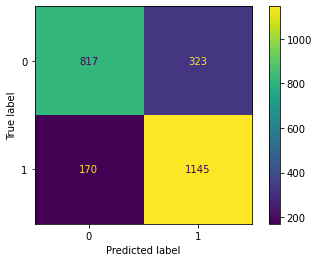

In [82]:
plot_confusion_matrix(estimator=model, X=X, y_true=y)

In [83]:
817/(817+323) 

0.7166666666666667

# Other Metrics

## Sensitivity

In [94]:
1145/(170 + 1145) # sensibilidad

0.870722433460076

## Specificity

In [95]:
817/(817+323) # especificidad

0.7166666666666667

## Classification Report

> 1. Use `classification_report()`
> 2. Save the resulting object in `report`
> 3. `print(report)`
> 4. Are some numbers equal to the ones we calculated before (Sensitivity & Specificity?

In [88]:
from sklearn.metrics import classification_report

report = classification_report(y_true=df.internet_usage, y_pred=predict)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1140
           1       0.78      0.87      0.82      1315

    accuracy                           0.80      2455
   macro avg       0.80      0.79      0.80      2455
weighted avg       0.80      0.80      0.80      2455



## ROC Curve

In [91]:
from sklearn.metrics import plot_roc_curve

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


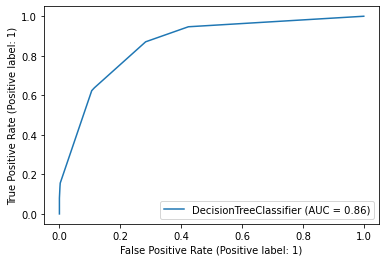

In [92]:
plot_roc_curve(model, X, y)

> - Use `plot_roc_curve()`
>
> _You may watch the following video to understand the metric:_

In [93]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how **the Decision Tree Algorithm** is just counting observations to determine the outcome.
- [ ] Another way to **compare real data with predictions** from the model.
- [ ] Not all model visualizations are equal.
    - A tree was visualized instead of an `scatterplot()` to interpret the model.
- [ ] Distinguish **probability's role** to optimize this type of models.
- [ ] Know how to determine **why a variable is important** in the model.
    - Why is it giving significant differences?
    - How does EDA helps us to see it?
- [ ] Understand the process of the algorithm to determine if we need to **normalize/scale** the data.